In [2]:
import pandas as pd

top_song = pd.read_json(r'./Dataset/top_songs_lyrics.json')

print(top_song.head())
print(top_song.columns)

   year          artist                      song  \
0  2014      Ed Sheeran         Thinking out Loud   
1  2014     Norah Jones         Come Away With Me   
2  2014     Troye Sivan         Happy Little Pill   
3  2014      The Script               Superheroes   
4  2014  Ellie Goulding  How Long Will I Love You   

                                              lyrics  
0  [Verse 1]\nWhen your legs don't work like they...  
1  [Verse 1]\nCome away with me in the night\nCom...  
2  [Verse 1]\nIn the crowd, alone\nAnd every seco...  
3  [Verse 1]\nAll her life, she has seen\nOh the ...  
4  [Intro]\nMm\nMm\n[Verse 1]\nHow long will I lo...  
Index(['year', 'artist', 'song', 'lyrics'], dtype='object')


# Basic Sentiment Analysis with VADER

**Objective**
- to determine the overall sentiment of each song's lyrics (positive, neutral, negative)

**Method**
- use Python packag, VADER to calculate sentiment polarity scores for each song's lyrics

**Steps**
1) Donwload VADER lexicon
2) Itializes VADER sentiment analyzer
3) Defines a funciton get_sentiment_score to compute the sentiment score of lyrics
4) Applies the function to the lyrics column to get sentiment scores
5) Label the sentiment based on the score using sentiment_label
6) print results (omit the lyrics)

**Notes**
- I have a mix of english and malay songs in the list, I'd have to use:
    * language detection library to automatically detect the language of a given text
    * Amazon Translate

**Setting up**
- Install nltk in vs code: https://www.nltk.org/


In [3]:
# testing - text transation 
from googletrans import Translator

translator = Translator()

malay_words1 = 'Saya sangat lapar dan dahaga. Bolehkah bagi saya makanan?'
malay_words2 = 'Nama saya Asyikin. Saya suka mengembara dan beriadah'

try:
    translated_sentence = translator.translate(malay_words1, dest='en').text
    print(translated_sentence)
    
except Exception as e:
    print(f'Error: {e}')

I'm so hungry and thirsty.Can I have food?


In [4]:
#testing - nltk 
import nltk 
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

sample_text = 'I am so angry!'
print(sia.polarity_scores(sample_text))

{'neg': 0.66, 'neu': 0.34, 'pos': 0.0, 'compound': -0.5974}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASYIKIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from googletrans import Translator

# # donwlonad VADER lexicon
# nltk.download('vader_lexicon')

#initialize VADER sentiment analyzer 
sia = SentimentIntensityAnalyzer()

#initialize google translator
translator = Translator()

# function to translate lyrics to English
def translate_lyrics(lyrics):
    try:
        return translator.translate(lyrics, dest='en').text
    except Exception as e:
        print(f'Error in Translation: {e}')
        return lyrics

#create a funciton to get sentiment score
def get_sentiment_score(lyrics):
    return sia.polarity_scores(lyrics)['compound']

#label the sentiment
def sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# apply translation function to the 'lyrics' column
top_song['translated_lyrics'] = top_song['lyrics'].apply(translate_lyrics)

#apply sentiment analysis to the translated lyrics
top_song['sentiment'] = top_song['translated_lyrics'].apply(get_sentiment_score)

#apply the labeling function
top_song['sentiment_label'] = top_song['sentiment'].apply(sentiment_label)

top_song[['year', 'artist', 'song', 'sentiment', 'sentiment_label']]

,year,artist,song,sentiment,sentiment_label
0,2014,Ed Sheeran,Thinking out Loud,0.9967,positive
1,2014,Norah Jones,Come Away With Me,0.1635,positive
2,2014,Troye Sivan,Happy Little Pill,0.4848,positive
3,2014,The Script,Superheroes,-0.9961,negative
4,2014,Ellie Goulding,How Long Will I Love You,0.9447,positive
...,...,...,...,...,...
160,2024,Rossa,Takkan Berpaling DariMu,0.9933,positive
161,2024,Hozier,Too Sweet,0.9985,positive
162,2024,Hozier,Work Song,-0.7612,negative
163,2024,Coi Leray,Players,0.9837,positive


In [6]:
# #Save to csv file 
# top_song_no_lyrics = top_song.drop(columns=['lyrics', 'translated_lyrics'])

# top_song_no_lyrics.to_csv('top_song_sentiment.csv', index=False)

In [7]:
# Replace 'Your Song Title' with the title of the song you want to view
song_title = 'Sial'
specific_song = top_song[top_song['song'] == song_title]

# Set pandas display options to show more text in the output
pd.set_option('display.max_colwidth', None)  # Show full content of all columns

# Display the original and translated lyrics of the specific song
print(specific_song[['song', 'translated_lyrics']])


     song  \
135  Sial   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# Issues
Malay songs
- Songs written in my native language were given neutral rating. 
- VADER sentiment analyzer is optimized for english, it does not understand foreign language hence the weird rating. 
- I used googletrans to translate the words before apply sentiment analysis to the songs.

Missign Songs
1) 2022 - Luqman
2) 2024 - Aina
- They're missing from the scraped lists bcs they're not found in Genius website, i think.
- I inserted them manually inot json file.

In [8]:
song_sentiment=pd.read_csv('./top_song_sentiment.csv')
# song_sentiment=song_sentiment.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
song_sentiment.head()

,year,artist,song,sentiment,sentiment_label
0,2014,Ed Sheeran,Thinking out Loud,0.9967,positive
1,2014,Norah Jones,Come Away With Me,0.1635,positive
2,2014,Troye Sivan,Happy Little Pill,0.4848,positive
3,2014,The Script,Superheroes,-0.9961,negative
4,2014,Ellie Goulding,How Long Will I Love You,0.9447,positive


In [9]:
song_sentiment.columns

Index(['year', 'artist', 'song', 'sentiment', 'sentiment_label'], dtype='object')

In [10]:
#sentiment distribution
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#group by sentiment_label and count occurances
sentiment_counts = song_sentiment['sentiment_label'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment_label', 'count']

# Create a bar chart for sentiment labels
fig = px.bar(
    sentiment_counts, x='count', y='sentiment_label',
    orientation='h',
    title='Distribution of Sentiment Labels',
    labels={'sentiment_label': 'Sentiment Label', 'count': 'Number of Songs'})

fig.show()

In [11]:
# #line chart for sentiment over time

# #group data by year and sentiment label and count the number of songs for each sentiment
# sentiment_over_time = song_sentiment.groupby(['year', 'sentiment_label']).size().reset_index(name='count')

# fig = px.line(
# sentiment_over_time, x='year', y='count', color='sentiment_label',
# title='Sentiment Trends Over the Years',
# labels={'year': 'Year', 'count': 'Number of Songs'})

# fig.show()

In [12]:
# # piechart for sentiment proprotion
# fig = px.pie(
#     song_sentiment, names='sentiment_label', title='Sentiment Label Proportions',
#     labels={'sentiment_label': 'Sentiment Label'})

# fig.show()

In [13]:
# #scatter plot - Year vs. Sentiment Score
# fig = px.scatter(
#     song_sentiment, x='year', y='sentiment', title='Sentiment Scores over the Year',
#     labels={'year': 'Year', 'sentiment': 'Sentiment Score'})

# fig.update_layout(
#     xaxis=dict(
#         tickmode='linear',
#         tick0=song_sentiment['year'].min(),
#         dtick=1)
# )

# fig.show()

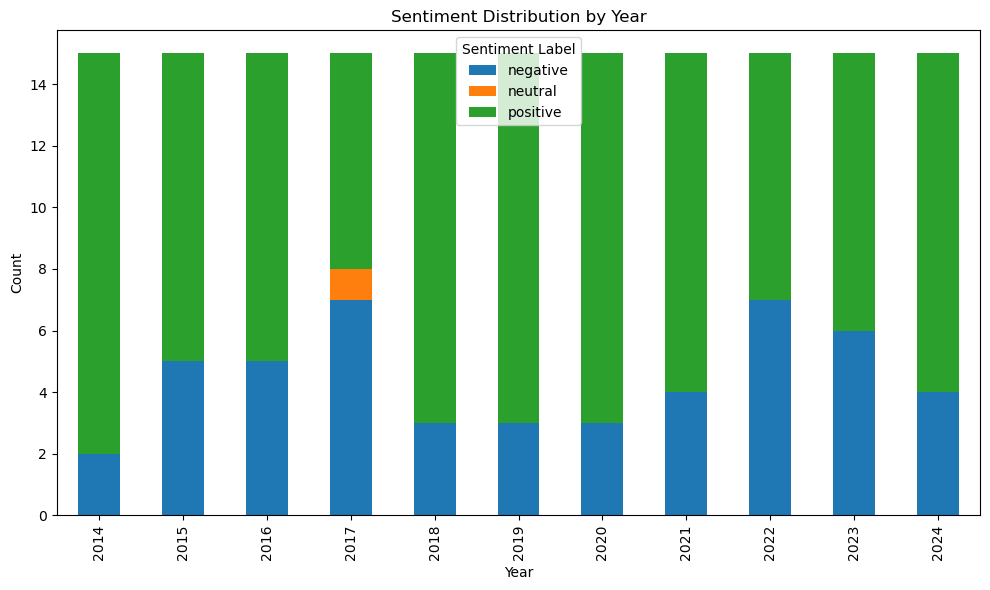

In [14]:
#stacked chart

#aggregate data by year and sentiment label
aggregated_data = song_sentiment.groupby(['year', 'sentiment_label']).size().unstack(fill_value=0)

ax = aggregated_data.plot(kind='bar', stacked=True, figsize=(10,6))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Year')
plt.legend(title='Sentiment Label')

plt.tight_layout()

# fig.write_html("./static/charts/sentimentDistr.html")

plt.show()

In [15]:
#Top Artist by Sentiment
artist_sentiment=song_sentiment.groupby('artist')['sentiment'].mean().reset_index()

fig = px.bar(
    artist_sentiment, x='artist', y='sentiment',
    title='Average Sentiment Scores by Artist',
    labels={'sentiment': 'Average Sentiment Score'},
    text='sentiment')

fig.update_layout(
    xaxis_title='Artist', yaxis_title='Average Sentiment Score',
    width=1500, height=800)

fig.show()

In [16]:
import plotly.express as px

# Aggregate number of songs per artist per year
song_counts = song_sentiment.groupby(['year', 'artist']).size().reset_index(name='count')

# Merge with average sentiment scores
sentiment_bubble_data = song_sentiment.groupby(['year', 'artist'])['sentiment'].mean().reset_index()
sentiment_bubble_data = pd.merge(sentiment_bubble_data, song_counts, on=['year', 'artist'])

# Create bubble chart
fig = px.scatter(sentiment_bubble_data, x='year', y='sentiment', size='count',
                 color='artist', hover_name='artist', 
                 title='Average Sentiment Scores by Artist (2014-2024)',
                 labels={'sentiment': 'Average Sentiment Score', 'count': 'Number of Songs'})

fig.update_layout(
    title={
        'text': 'Average Sentiment Scores by Artist (2014-2024)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'color': 'white'}
    },
    plot_bgcolor='rgb(30, 30, 30)',  # Dark background
    paper_bgcolor='rgb(30, 30, 30)',  # Dark paper background
    font=dict(color='white'),  # White font color for labels
    xaxis=dict(
        showgrid=True,
        gridcolor='rgb(70, 70, 70)',  # Subtle grid lines
        zerolinecolor='rgb(120, 120, 120)',  # Zero line
        title=dict(text='Year', font=dict(color='white'))
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='rgb(70, 70, 70)',
        zerolinecolor='rgb(120, 120, 120)',
        title=dict(text='Average Sentiment Score', font=dict(color='white'))
    ),
    legend=dict(
        font=dict(color='white'),
        bgcolor='rgba(0, 0, 0, 0)'  # Transparent background
    ),
)


fig.write_html("./static/charts/sentimentScore.html")

fig.show()



In [28]:
# artist with the highest negative scores

#filter for negative sentiment
negative_songs = song_sentiment[song_sentiment['sentiment'] < 0]

#remove duplicates, eminem and lily allen appears multiple times for different years
negative_songs_unique = negative_songs.loc[negative_songs.groupby('song')['sentiment'].idxmin()]

#sort negative songs
negative_songs_sorted = negative_songs_unique.sort_values(by='sentiment', ascending=True)

#top 15 songs
nega_song_sorted = negative_songs_sorted.head(15)

fig = px.bar(
    nega_song_sorted,
    x='sentiment',
    y='song',
    title='Songs with Strong Negative Sentiment', 
    labels={'sentiment': 'Negative Sentiment Score', 'song': 'Song'},
    orientation='h',
    color='sentiment',
    color_continuous_scale=px.colors.sequential.Reds[::-1],            # REVERSE THE RED COLOR SCALE 
    hover_data={'artist': True, 'year': True}
)

#update layout
fig.update_layout(
    xaxis_title='Negative Sentiment Score',
    yaxis_title='Song', 
    yaxis=dict(
        categoryorder='total ascending',
        showgrid=True,
        gridcolor='rgb(70, 70, 70)',  # Subtle grid lines in dark mode
        zerolinecolor='rgb(120, 120, 120)',  # Zero line
        ),
    xaxis=dict(
        tickmode='linear',
        tick0=-1,
        dtick=0.2,
        range=[-1, 0], 
        showgrid=True,
        gridcolor='rgb(70, 70, 70)',  # Subtle grid lines in dark mode
        zerolinecolor='rgb(120, 120, 120)',  # Zero line
    ),
    width=650,
    height=400,
    showlegend=False,
    coloraxis_showscale=False, 
    plot_bgcolor='rgb(30, 30, 30)',  # Dark background for the plot
    paper_bgcolor='rgb(30, 30, 30)',  # Dark paper background
    font=dict(color='white'),  # White font color for labels and text
    title=dict(
        font=dict(size=24, color='white'),  # Title in white color
        x=0.5,  # Center the title
        xanchor='center'
    ),
)

fig.write_html("./static/charts/negativeScore.html")

fig.show()

In [27]:
# artist with the highest positive scores

#filter for positive sentiment
positive_songs = song_sentiment[song_sentiment['sentiment'] > 0]

#remove duplicates, eminem and lily allen appears multiple times for different years
positive_songs_unique = positive_songs.loc[positive_songs.groupby('song')['sentiment'].idxmin()]

#sort positive songs
positive_songs_sorted = positive_songs_unique.sort_values(by='sentiment', ascending=False)

#top 15 songs
posi_song_sorted = positive_songs_sorted.head(15)

fig = px.bar(
    posi_song_sorted,
    x='sentiment',
    y='song',
    title='Songs with Strong Positive Sentiment', 
    labels={'sentiment': 'Positive Sentiment Score', 'song': 'Song'},
    orientation='h',
    color='sentiment',
    color_continuous_scale=px.colors.sequential.Greens[::-1],            # REVERSE THE Green COLOR SCALE 
    hover_data={'artist': True}
)

#update layout
fig.update_layout(
    xaxis_title='Positive Sentiment Score',
    yaxis_title='Song', 
    yaxis=dict(categoryorder='total ascending',
        showgrid=True,
        gridcolor='rgb(70, 70, 70)',  # Subtle grid lines in dark mode
        zerolinecolor='rgb(120, 120, 120)',  # Zero line
    ),
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=0.2,
        range=[0, 1],
        showgrid=True,
        gridcolor='rgb(70, 70, 70)',  # Subtle grid lines in dark mode
        zerolinecolor='rgb(120, 120, 120)',  # Zero line
    ),
    width=650,
    height=400,
    showlegend=False,
    coloraxis_showscale=False, 
    plot_bgcolor='rgb(30, 30, 30)',  # Dark background for the plot
    paper_bgcolor='rgb(30, 30, 30)',  # Dark paper background
    font=dict(color='white'),  # White font color for labels and text
    title=dict(
        font=dict(size=24, color='white'),  # Title in white color
        x=0.5,  # Center the title
        xanchor='center'
    ),
)

fig.write_html("./static/charts/positiveScore.html")


fig.show()

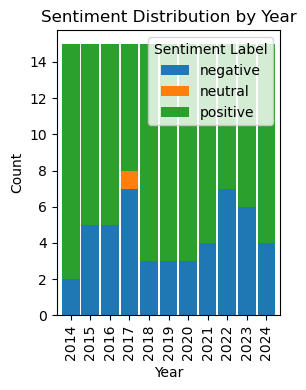

In [24]:
#stacked chart

#aggregate data by year and sentiment label
aggregated_data = song_sentiment.groupby(['year', 'sentiment_label']).size().unstack(fill_value=0)

ax = aggregated_data.plot(kind='bar', stacked=True, figsize=(3,4), width=0.9)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Year')
plt.legend(title='Sentiment Label')

# Adjust spacing to reduce gaps further
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
plt.tight_layout()

fig.write_html("./static/charts/sentimentDistr.html")

plt.show()